In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [13]:
car_df = pd.read_csv("car data.csv")

In [19]:
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [23]:
car_df.shape

(301, 9)

In [25]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [27]:
car_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [29]:
print(car_df.Fuel_Type.value_counts())
print(car_df.Seller_Type.value_counts())
print(car_df.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [39]:
car_df.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)
car_df.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace=True)
car_df.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace=True)

C:\Users\erenk\AppData\Local\Temp\ipykernel_13144\2023518876.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_df.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)
C:\Users\erenk\AppData\Local\Temp\ipykernel_13144\2023518876.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_df.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace=True)
C:\Users\erenk\AppData\Local\Temp\ipykernel_13144\2023518876.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future 

In [41]:
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [45]:
X = car_df.drop(["Car_Name","Selling_Price"],axis=1)
Y = car_df["Selling_Price"]

In [47]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [49]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [51]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y,test_size = 0.1,random_state=3)

In [53]:
X_train

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
5,2018,9.83,2071,1,0,0,0
101,2017,1.82,1400,0,1,0,0
115,2015,1.47,17500,0,1,0,0
38,2016,3.76,10079,0,0,0,0
245,2012,9.40,71000,1,0,0,0
...,...,...,...,...,...,...,...
277,2015,13.60,21780,0,0,0,0
256,2016,13.60,49562,0,0,0,0
131,2015,0.82,18000,0,1,0,0
249,2016,7.60,17000,0,0,0,0


In [55]:
Y_train

5       9.25
101     1.70
115     1.11
38      3.00
245     5.20
       ...  
277     9.70
256    10.25
131     0.75
249     5.25
152     0.50
Name: Selling_Price, Length: 270, dtype: float64

In [57]:
linear_reg=LinearRegression()

In [59]:
linear_reg.fit(X_train,Y_train)

LinearRegression()

In [71]:
training_data_prediction = linear_reg.predict(X_train)

In [73]:
error_score = metrics.r2_score(Y_train,training_data_prediciton)
print("R squared Error: ",error_score)

R squared Error:  0.8849815853900538


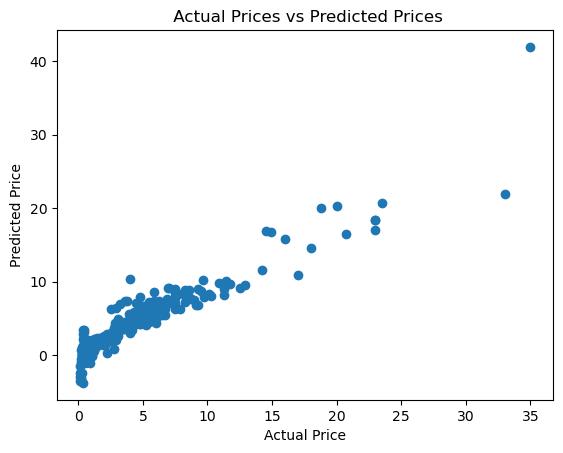

In [75]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [79]:
test_data_prediction = linear_reg.predict(X_test)

In [81]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.7979072218427194


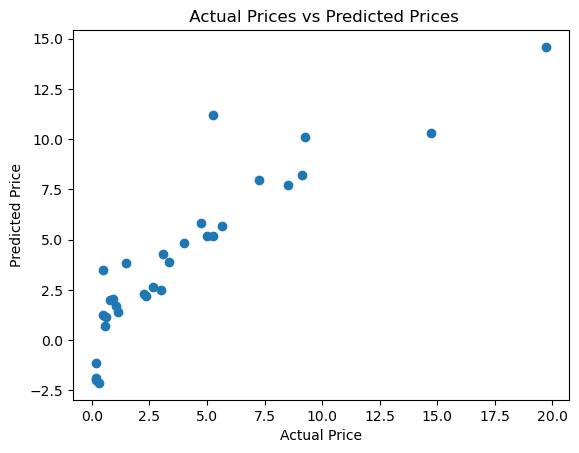

In [83]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [85]:
lass_reg_model = Lasso()

In [87]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [89]:
training_data_prediction = lass_reg_model.predict(X_train)

In [91]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8469788692279795


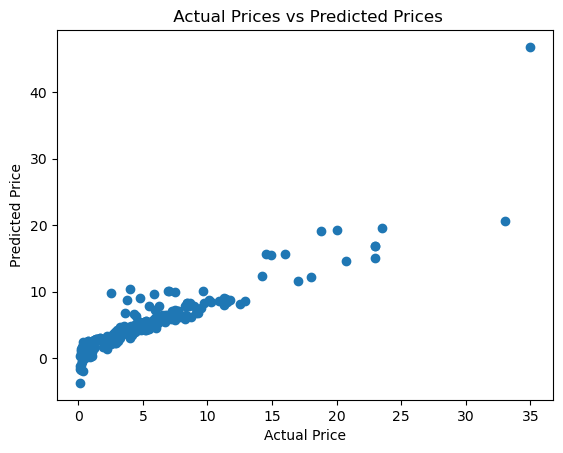

In [93]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [95]:
test_data_prediction = lass_reg_model.predict(X_test)

In [97]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.7946492652998925


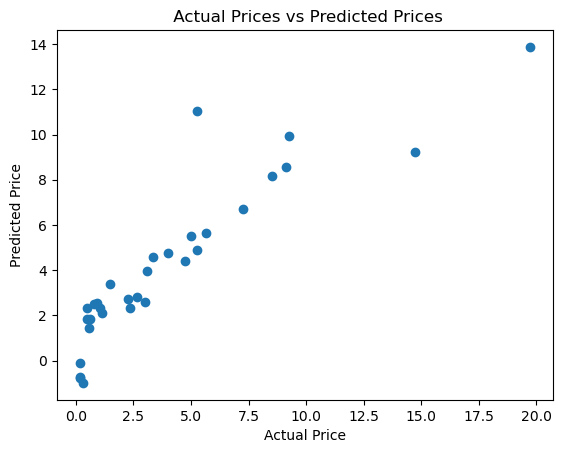

In [99]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()